# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [4]:
#print the unique values in Y_train

np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

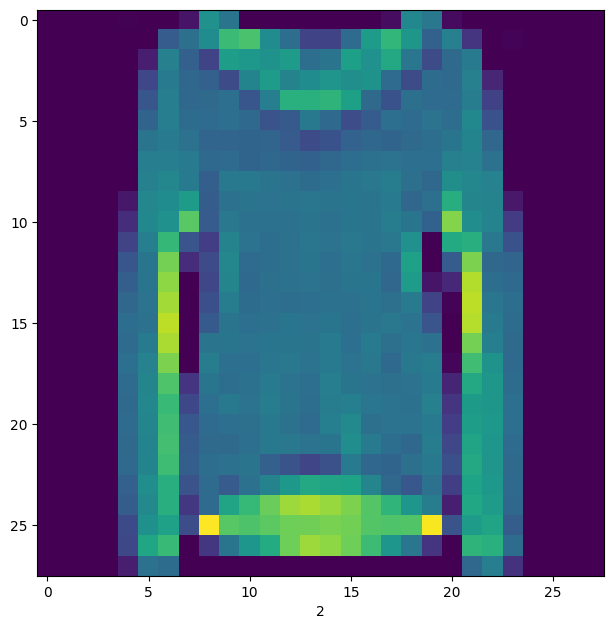

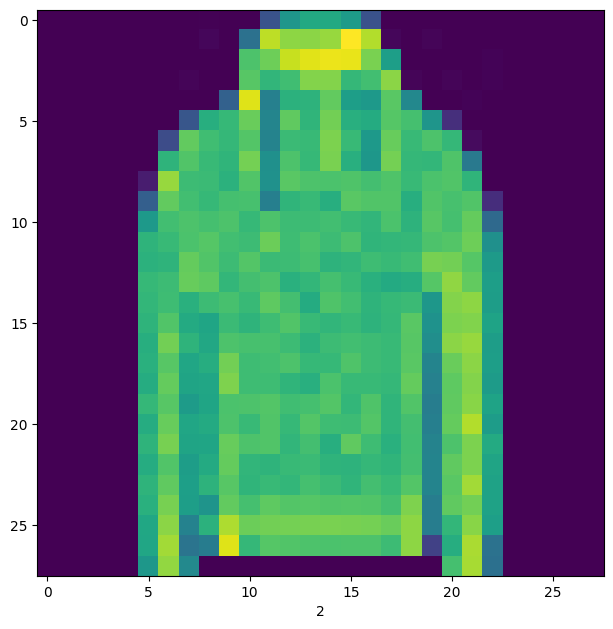

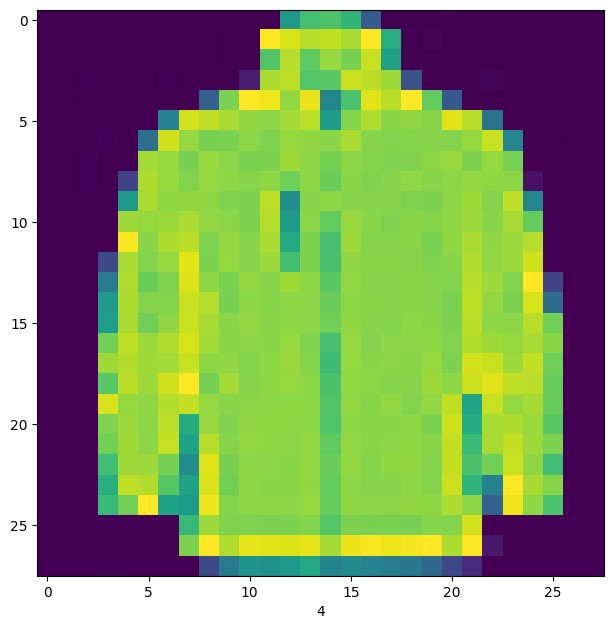

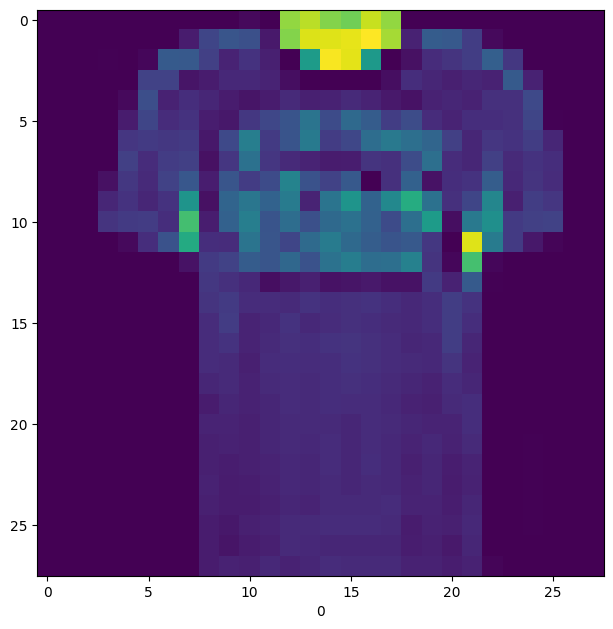

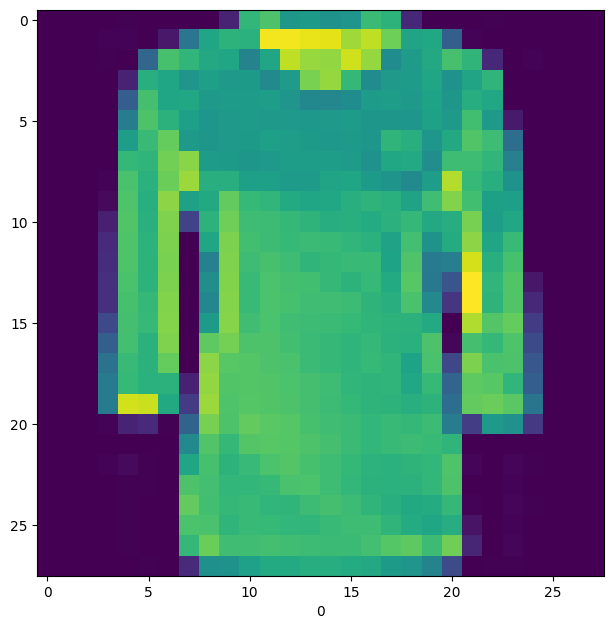

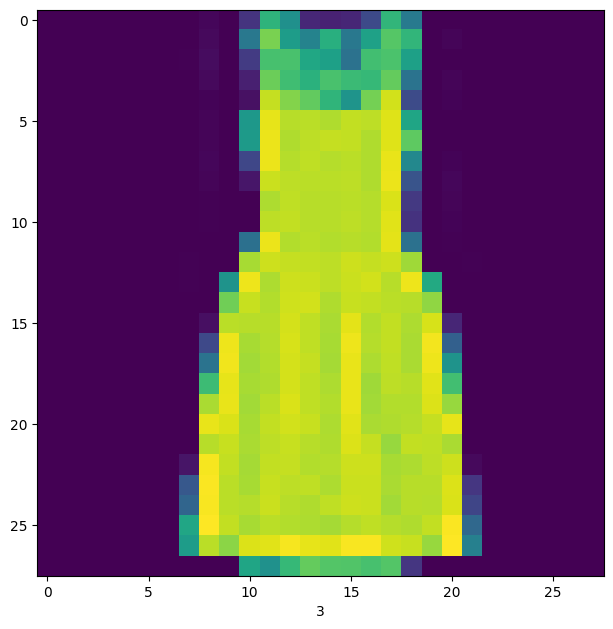

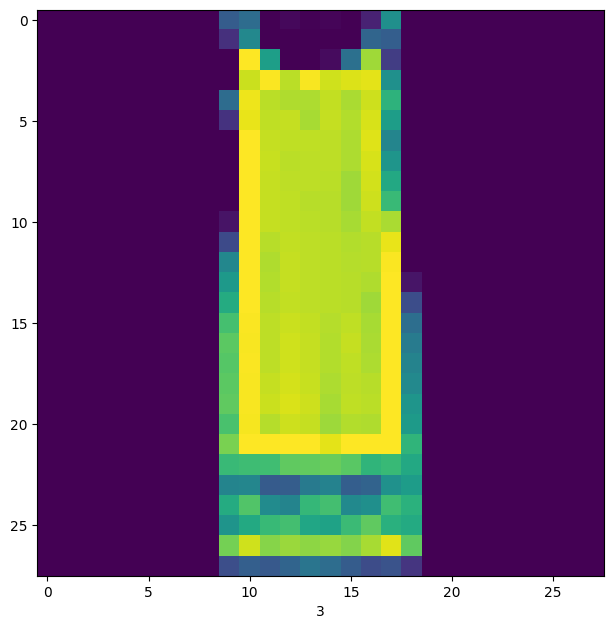

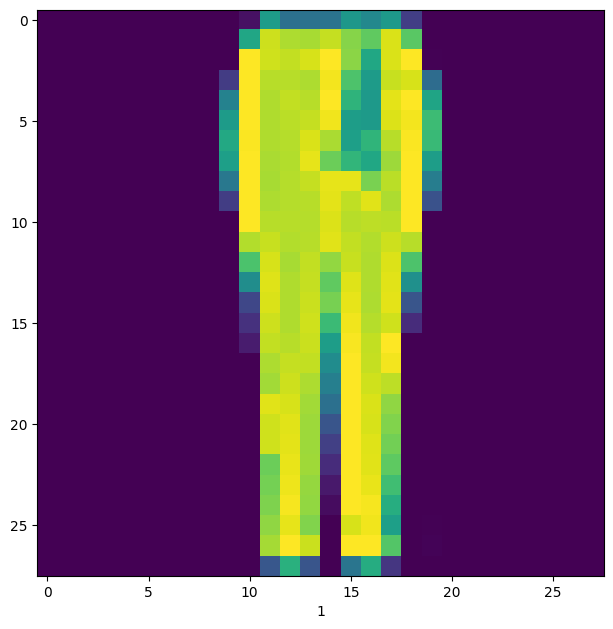

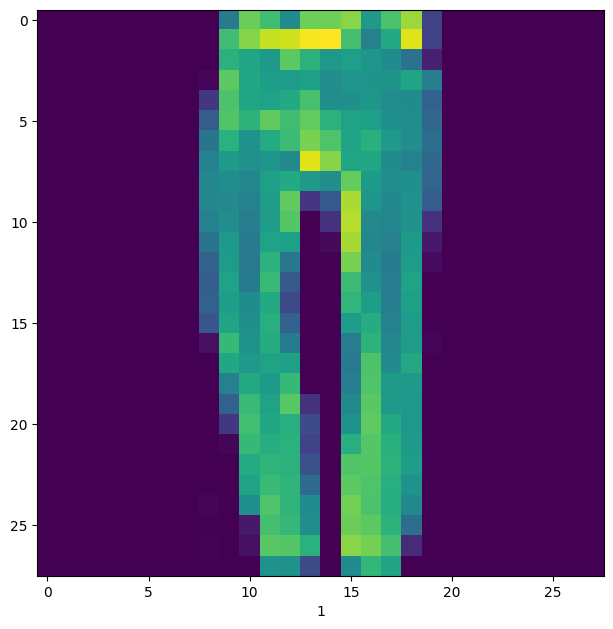

In [5]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random

for i in range(9):
  figure = plt.figure(figsize=(25,25))
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])#edit1__plot_image_here_
  plt.xlabel(Y_train[index])#edit2__add_label_here_
  
  plt.show()


###These number denotes the respective object
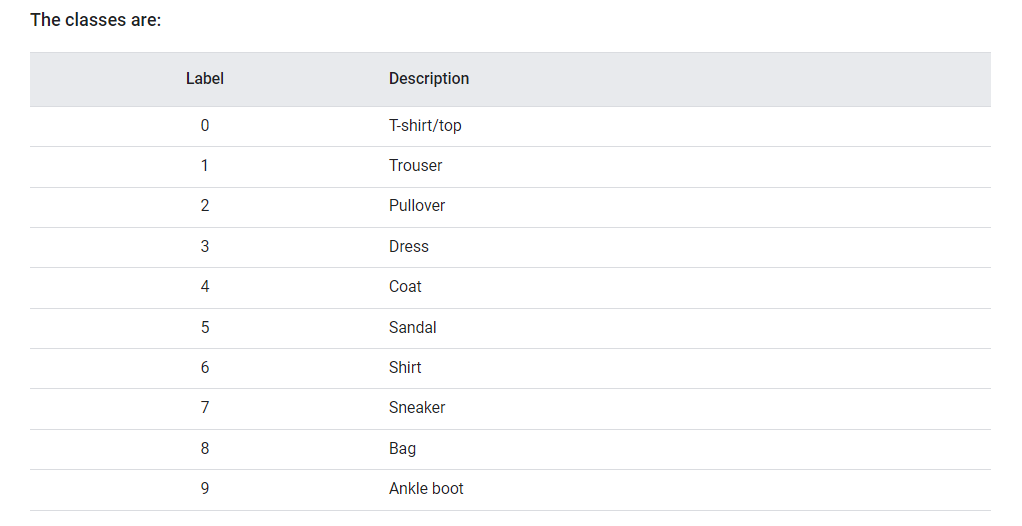

In [6]:
# Find the count of each type of class

map = {0:'T-shirt/top' , 1: 'Trouser' , 2: 'Pullover' , 3: 'Dress' , 4: 'Coat', 5 : 'Sandal' , 6: 'Shirt', 7:'Sneaker', 8:'Bag' , 9:'Ankle boot'}



for i in range(10):
  print("Number of {} is ".format(map[i]), np.count_nonzero(Y_train == i))


Number of T-shirt/top is  797
Number of Trouser is  797
Number of Pullover is  792
Number of Dress is  813
Number of Coat is  792
Number of Sandal is  815
Number of Shirt is  797
Number of Sneaker is  789
Number of Bag is  785
Number of Ankle boot is  823


In [7]:
# model initialization

model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

model.add(tf.keras.layers.Dense(96, activation = 'relu'))
#model.add(tf.keras.layers.Dense(64, activation = 'relu'))
#model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(48, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))

In [8]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = "sparse_categorical_crossentropy"
                  ,metrics=['accuracy'])

In [9]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 96)                12384     
                                                                 
 dense_3 (Dense)             (None, 48)                4656      
                                                                 
 dense_4 (Dense)             (None, 16)                784       
                                                                 
 dense_5 (Dense)             (None, 10)                1

###What is the number of trainable parameters in the model?

In [10]:
""" 
[objective] Write the answer here: 
134986
"""

' \n[objective] Write the answer here: \n139194\n'

In [11]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train ,Y_train , epochs = 30, validation_split=0.2)

Epoch 1/30
200/200 [==============================] - 2s 7ms/step - loss: 2.8744 - accuracy: 0.2495 - val_loss: 1.8922 - val_accuracy: 0.3162
Epoch 2/30
200/200 [==============================] - 1s 6ms/step - loss: 1.7448 - accuracy: 0.3997 - val_loss: 1.6992 - val_accuracy: 0.4462
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 1.4683 - accuracy: 0.5170 - val_loss: 1.4523 - val_accuracy: 0.5300
Epoch 4/30
200/200 [==============================] - 1s 4ms/step - loss: 1.2844 - accuracy: 0.5905 - val_loss: 1.3935 - val_accuracy: 0.5806
Epoch 5/30
200/200 [==============================] - 1s 4ms/step - loss: 1.1732 - accuracy: 0.6105 - val_loss: 1.3323 - val_accuracy: 0.5638
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 1.0536 - accuracy: 0.6423 - val_loss: 1.1603 - val_accuracy: 0.6300
Epoch 7/30
200/200 [==============================] - 1s 7ms/step - loss: 0.9177 - accuracy: 0.6989 - val_loss: 1.1011 - val_accuracy: 0.6669
Epoch 

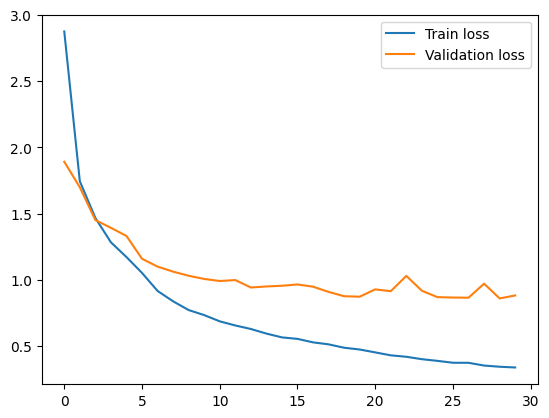

In [12]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [13]:
"""
[Under 100 words] Write your answer here: 
We observe that initially both train loss and val loss falls rapidly with each epoch, the magnitude of rate of change decreases with increase in epochs.
Train loss consistently decreases however val loss seems to stagnate after roughly 15 epochs . 
The model is probably overfitting after 15 epochs as val loss is fluctuating slightly , whereas train loss is still decreasing.
"""

'\n[Under 100 words] Write your answer here: \nWe observe that initially both train loss and val loss falls rapidly with each epoch, the magnitude of rate of change decreases with increase in epochs.\nTrain loss consistently decreases however val loss seems to stagnate after roughly 15 epochs . \nThe model is probably overfitting after 15 epochs as val loss is fluctuating slightly , whereas train loss is still decreasing.\n'

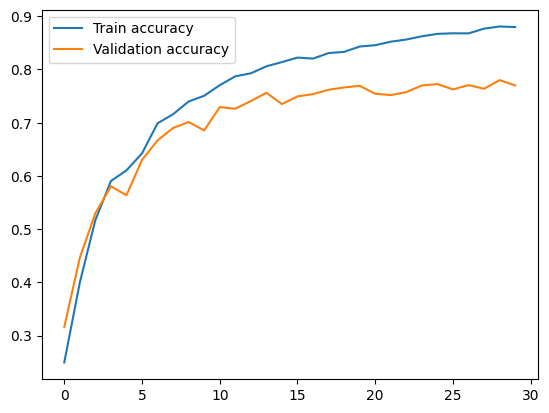

In [14]:
#plotting the accuracy of the training

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [15]:
"""
[Under 100 words] Write your answer here:
Like in the case of loss , for accuracy again train accuracy increases rapidly in the beginning and the magnitude of rate of change decreases with more epochs.
Val accuracy also increases rapidly but only till 10 epochs. After that it gradually increases , fluctuationg along the way. 
The increasing gap between train accuracy and val accuracy denotes overfitting of the model.
"""

'\n[Under 100 words] Write your answer here:\nLike in the case of loss , for accuracy again train accuracy increases rapidly in the beginning and the magnitude of rate of change decreases with more epochs.\nVal accuracy also increases rapidly but only till 10 epochs. After that it gradually increases , fluctuationg along the way. \nThe gap between train accuracy and val accuracy denotes overfitting of the model.\n'

In [16]:
#Checking the prediction

Y_predicted = model.predict(X_test)

y_pred = np.argmax(Y_predicted , axis = 1)

63/63 [==============================] - 0s 2ms/step


In [17]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
r2_score(Y_test , y_pred)


0.6815672376872031

In [18]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [19]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)
print(model.layers[5].kernel.shape)
print(model.layers[6].kernel.shape)


(128, 128)
(128, 96)
(96, 48)
(48, 16)
(16, 10)


In [20]:
# Does that satisfied the matrix multiplication math discussed earlier
"""
Yes it is clear that each kernel has shape m x n where m is the number of neurons in previous layer and n is the number of neurons in current layer. 
So when row of m activations of previous layer is multiplied by this kernerl matrix of mxn we get n outputs which are added with bias and give n activations of output layer using activation function
"""

'\nYes it is clear that each kernel has shape m x n where m is the number of neurons in previous layer and n is the number of neurons in current layer. \nSo when row of m activations of previous layer is multiplied by this kernerl matrix of mxn we get n outputs which are added with bias and give n activations of output layer using activation function\n'